In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/Hyderabad.csv')
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(2518, 40)

In [ ]:
# label --> Price
# features --> all remaining
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [ ]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,...,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,9.818380e+06,1644.571088,2.623511,0.227562,0.412629,0.739873,0.709690,0.619142,0.559968,0.606434,...,0.975774,0.360207,0.607228,0.342732,0.330024,0.321287,0.334392,0.342335,0.341144,0.324861
std,8.777113e+06,746.256956,0.687330,0.419341,1.626445,1.611024,1.615231,1.624426,1.627686,1.625308,...,1.557725,1.622778,1.625256,1.621178,1.619894,1.618953,1.620347,1.621139,1.621023,1.619344
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.754000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1829.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
df['Price'].median() # 7.754e+06

7754000.0

In [ ]:
df['Price'].max()  # 1.65e+08

165000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [ ]:
df.corr(numeric_only= True).iloc[:1, : 5]

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff
Price,1.0,0.82931,0.614283,0.203878,0.013022


In [ ]:
df.corr().loc[['Area', 'Price'], ['Area', 'Price']]

<ipython-input-12-e2759a2a995b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc[['Area', 'Price'], ['Area', 'Price']]


,Area,Price
Area,1.00000,0.82931
Price,0.82931,1.00000


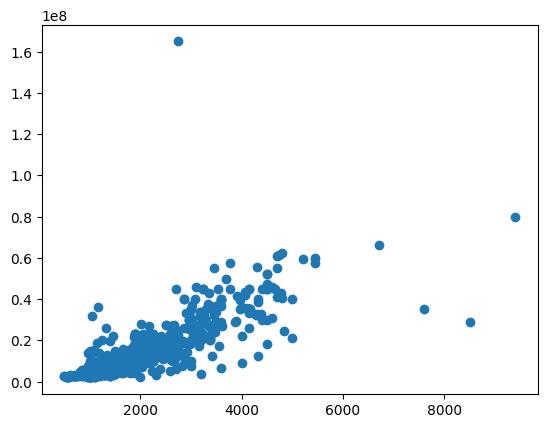

In [ ]:
# Relation between Area of the house and price of the house
plt.scatter(df['Area'], df['Price'])

In [ ]:
6 * df['Price'].std()  # 2.63e+07

52662677.26457316

In [ ]:
df[['Price', 'Area']].sort_values(by = 'Price', ascending = False).head(20)

,Price,Area
2385,165000000,2750
750,80000000,9400
386,66400000,6718
1814,62300000,4800
2354,61400000,4730
1756,61000000,4700
2311,60000000,5440
1239,59600000,5200
2361,57500000,5440
2079,57500000,3765


In [ ]:
filt = df['Price'] < 6 * df['Price'].std()
new_df = df[filt]
new_df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [ ]:
filt

0       True
1       True
2       True
3       True
4       True
        ... 
2513    True
2514    True
2515    True
2516    True
2517    True
Name: Price, Length: 2518, dtype: bool

In [ ]:
new_df.shape

(2505, 40)

In [ ]:
new_df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.505000e+03,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,...,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000
mean,9.511449e+06,1627.000798,2.615170,0.226347,0.413174,0.739721,0.709381,0.618762,0.558882,0.606387,...,0.976447,0.361677,0.607186,0.344511,0.331737,0.322954,0.336128,0.344112,0.342515,0.326547
std,7.415244e+06,697.848020,0.673857,0.418550,1.630305,1.614914,1.619129,1.628289,1.631553,1.629145,...,1.561519,1.626743,1.629092,1.625192,1.623919,1.622984,1.624368,1.625154,1.625000,1.623372
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.625000e+06,1490.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.080000e+07,1815.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.200000e+07,8500.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


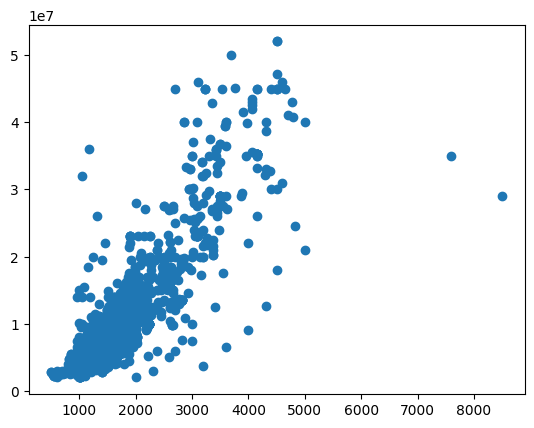

In [ ]:
plt.scatter(new_df['Area'], new_df['Price'])

In [ ]:
X = new_df['Area']  # independent variable
y = new_df['Price']  # dependent variable

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(2004,)

In [ ]:
X_test.shape

(501,)

In [ ]:
# Linear Regression Model
reg = LinearRegression()
reg.fit(np.array(X_train).reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
reg.coef_

array([9152.04457007])

In [ ]:
reg.intercept_

-5409087.861132951

In [ ]:
X_test.iloc[1]

2270

In [ ]:
9152.04457007 * 2270 + (-5409087.861132951)

15366053.312925948

In [ ]:
y_pred = reg.predict(np.array(X_test).reshape(-1, 1))

In [ ]:
y_pred

array([ 6625850.74851231, 15366053.3129315 ,  9829066.34803767,
       11064592.36499745,  5115763.39445036,  5161523.61730072,
        3742956.70893949,  5115763.39445036,  3971757.8231913 ,
        5115763.39445036, 11055440.32042738,  9234183.45098296,
       20216636.9350699 ,  5573365.62295398,  5719798.33607514,
       16601579.32989128, 17104941.78124526,  4200558.93744311,
        9206727.31727274, 10067019.50685955,  7092605.02158601,
        9829066.34803767, 11952340.68829448,  5573365.62295398,
       22870729.8603909 , 10881551.473596  ,  7458686.80438891,
       10423949.24509238,  5463541.08811311,  5207283.84015108,
        6214008.74285905, 12895001.27901194,  8456259.6625268 ,
        9234183.45098296, 11842516.15345361, 10103627.68513984,
        6323833.27769992,  9096902.78243187,  5344564.50870217,
        9499592.74351506, 32663417.55036842, 32535288.92638741,
       15640614.65003367,  5390324.73155253, 13471580.0869265 ,
       26147161.81647684,  9279943.67383

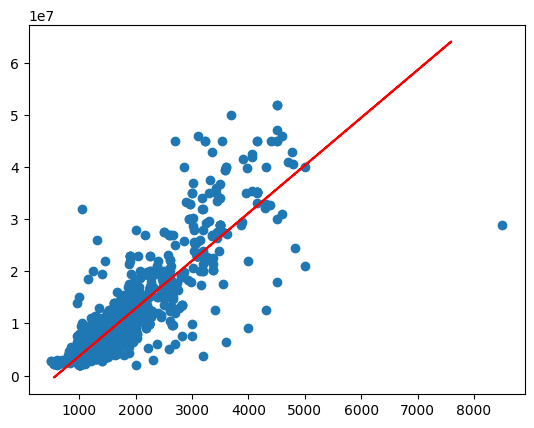

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
accuracy = round(r2_score(y_test, y_pred), 2)
accuracy

0.7641339795306994

In [ ]:
new_df['Area'].head()

0    1340
1    3498
2    1318
3    1295
4    1145
Name: Area, dtype: int64

In [ ]:
houses = np.array([1200, 1458, 3596 , 1234, 6978, 768]).reshape(-1, 1)
reg.predict(houses)

array([ 5573365.62295398,  7934593.12203267, 27501664.41284756,
        5884535.13833645, 58453879.14883257,  1619682.36868269])

In [ ]:
# y = mx + c
m = 9152.04457007
c = -5409087.861132951

y = m * 1200 + c
y

5573365.622951049

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
np.sqrt(mse(y_test, y_pred))

3799780.3168399525

### Multi variate Linear Regression

In [ ]:
pd.set_option('display.max_columns', 40)

In [ ]:
new_df.corr().iloc[0 : 1, : ]

<ipython-input-46-b2b056228541>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr().iloc[0 : 1, : ]


,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.0,0.863089,0.649814,0.225218,0.01935,0.083345,0.091225,0.073561,0.075258,0.062033,0.073499,-0.003834,0.057409,0.026498,0.014886,0.075249,-0.010843,0.073602,0.049281,0.067773,0.027867,0.012883,0.060918,-0.009594,-0.000361,-0.002925,0.013784,-0.001645,0.076793,0.041564,-0.000323,0.06001,-0.007918,-0.015877,0.001863,0.001378,-0.000286,-0.000909,0.001333


In [ ]:
 # High corr between our label(Price) and other features
 # Area,	No. of Bedrooms,
new_X = new_df[['Area',	'No. of Bedrooms']]
new_y = new_df['Price']

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size = 0.2, random_state = 0)

In [ ]:
lr = LinearRegression()
lr.fit(new_X_train, new_y_train)

LinearRegression()

In [ ]:
new_X_test.shape

(501, 2)

In [ ]:
new_X_test.head()

,Area,No. of Bedrooms
1722,1315,2
1838,2270,3
1668,1665,3
704,1800,3
400,1150,2


In [ ]:
new_y_test

1722     8095000
1838    14500000
1668    10500000
704     12400000
400      8600000
          ...   
1576     9291000
2035     6895999
48       5900000
303      8200000
220      7840000
Name: Price, Length: 501, dtype: int64

In [ ]:
lr.predict([new_X_test.iloc[1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15452872.74896613])

In [ ]:
new_predict = lr.predict(new_X_test)

In [ ]:
RMSE = np.sqrt(mse(new_y_test, new_predict))
RMSE

3755449.5175830373

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(new_y_test, new_predict)

0.7696054195674296

In [ ]:
# weights
# beta 1, beta 2
lr.coef_

array([   9776.11437993, -820551.35786677])

In [ ]:
# beta 0
lr.intercept_

-4277252.819871929

In [ ]:
P = 9776.11437993 *  1315 + (-820551.35786677) * 2 + (-4277252.819871929)
P

6937234.874002483

In [ ]:
new_X_test.iloc[0]

Area               1315
No. of Bedrooms       2
Name: 1722, dtype: int64

In [ ]:
new_predict[0]

6937234.8740008995

### Scaling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/multi_lin_data_scale.txt', delimiter = ',')
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1.0,790,99
1,Mitsubishi,Space Star,1.2,1160,95
2,Skoda,Citigo,1.0,929,95
3,Fiat,500,0.9,865,90
4,Mini,Cooper,1.5,1140,105


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
df.corr(numeric_only = True)

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Volume', 'Weight']]
y = df['CO2']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.head()

,Volume,Weight
7,1.5,1365
2,1.0,929
0,1.0,790
15,1.6,1330
6,1.4,1109


In [ ]:
X_train_scale = scale.fit_transform(X_train)
X_train_scale[: 5]

array([[-0.24211463,  0.31195116],
       [-1.54580879, -1.48272355],
       [-1.54580879, -2.05487902],
       [ 0.0186242 ,  0.16788323],
       [-0.50285346, -0.7418028 ]])

In [ ]:
X_test_scale = scale.fit_transform(X_test)
y_train_scale = scale.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scale = scale.fit_transform(np.array(y_test).reshape(-1, 1))

In [ ]:
# stats after scaling
stat_df = df[['Volume', 'Weight', 'CO2']]
stat_df_scale = pd.DataFrame(scale.fit_transform(stat_df))

In [ ]:
stat_df_scale.describe()

,0,1,2
count,3.600000e+01,3.600000e+01,3.600000e+01
mean,-1.233581e-17,-2.498002e-16,8.881784e-16
std,1.014185e+00,1.014185e+00,1.014185e+00
min,-1.854099e+00,-2.103893e+00,-1.636364e+00
25%,-3.548862e-01,-7.331394e-01,-5.819863e-01
50%,-2.897030e-02,1.538185e-01,-4.119254e-01
75%,1.013960e+00,5.276602e-01,4.043671e-01
max,2.317624e+00,1.900508e+00,2.445098e+00


In [ ]:
reg = LinearRegression()
reg_scale = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)
reg_scale.fit(X_train_scale, y_train_scale)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred = reg.predict(X_test)
y_pred_scale = reg_scale.predict(X_test_scale)

In [ ]:
reg_err = r2_score(y_test, y_pred)
reg_scale_err = r2_score(y_test_scale, y_pred_scale)

In [ ]:
print('Before Scaling: ', reg_err)
print('After Scaling: ', reg_scale_err)

Before Scaling:  0.5988974560124157
After Scaling:  0.610779355380781


In [ ]:
reg.coef_

array([7.90412632e+00, 6.14682716e-03])

In [ ]:
reg_scale.coef_

array([[0.40209956, 0.19807843]])

In [ ]:
scale.fit_transform(np.array(y_pred).reshape(-1, 1))

array([[-0.58589282],
       [ 0.98460184],
       [ 0.02349196],
       [-0.05200381],
       [-2.16606798],
       [-0.1108905 ],
       [ 0.66876163],
       [ 1.23799969]])

In [ ]:
y_pred_scale

array([[-0.33155522],
       [ 0.54003094],
       [ 0.01938649],
       [-0.02501143],
       [-1.21626264],
       [-0.05964181],
       [ 0.36914667],
       [ 0.703907  ]])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print("Before scaling mae: ", mean_absolute_error(y_test, y_pred))
print("Before scaling mse: ", mean_squared_error(y_test, y_pred))

Before scaling mae:  3.899753872702698
Before scaling mse:  17.6422447082039


In [ ]:
print("After scaling mae: ", mean_absolute_error(y_test_scale, y_pred_scale))
print("After scaling mse: ", mean_squared_error(y_test_scale, y_pred_scale))

After scaling mae:  0.5355539636255955
After scaling mse:  0.3892206446192191


### Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = 5 * np.random.rand(400, 1) - 3
y = 0.7 * X ** 2 + 0.8 * X + 2 + np.random.rand(400, 1)
# y = 0.7 X^2 + 0.8 X + 2

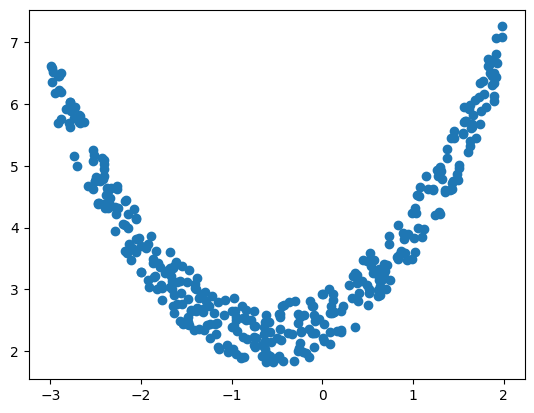

In [3]:
plt.scatter(X, y)
plt.show()

In [4]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()

In [7]:
reg.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = reg.predict(X_test)

In [9]:
from sklearn.metrics import r2_score

In [10]:
r_squared_score = r2_score(y_test, y_pred)
r_squared_score

0.04536858489896689

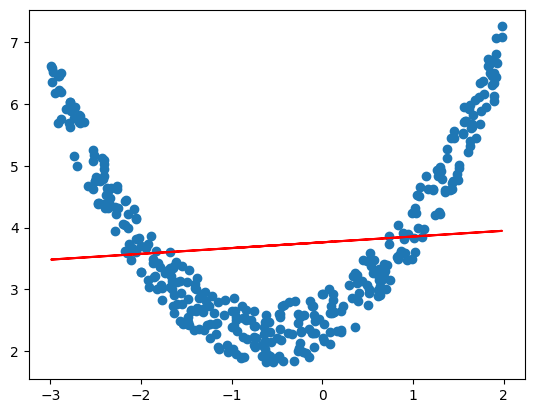

In [11]:
plt.plot(X_train, reg.predict(X_train), color = 'r')
plt.scatter(X, y)
plt.show()